### ASI assessed exercise 2016/2017

#### student: <b>Gaballo</b> Alessandro

In [1]:
# keras and tensorflow are required
from keras.datasets import mnist
from keras.datasets import cifar10
from time import time
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


 <b>Q1.</b> Download the MNIST and CIFAR10 datasets and import them.

In [2]:
(mnist_train, mnist_label_train), (mnist_test, mnist_label_test) = mnist.load_data()
(cifar_train, cifar_label_train), (cifar_test, cifar_label_test) = cifar10.load_data()

<b>Q2.</b> Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis.

In [3]:
mnist_training_count, bins = np.histogram(mnist_label_train, bins=10)
mnist_test_count, bins = np.histogram(mnist_label_test, bins=10)

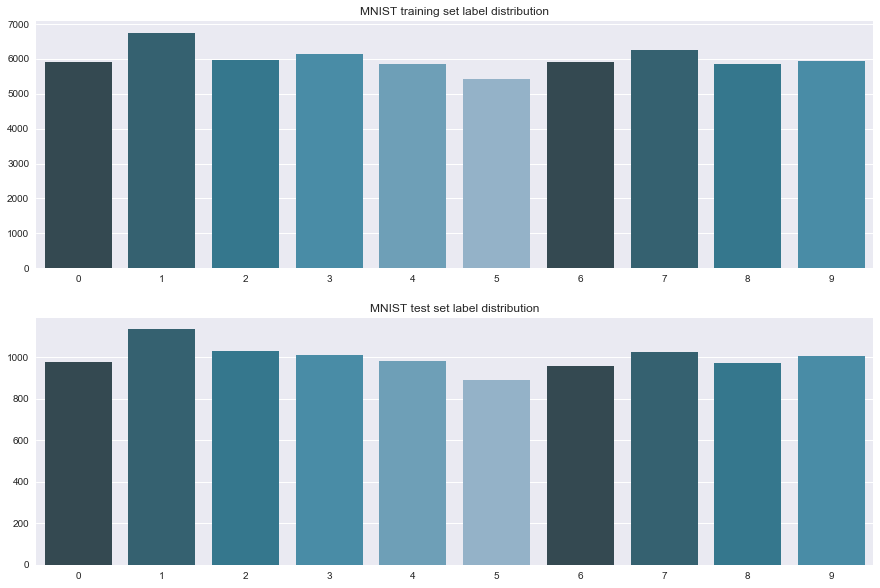

In [4]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("MNIST training set label distribution")
sns.barplot(np.arange(10), mnist_training_count, palette=sns.color_palette("PuBuGn_d"))
plt.xticks(np.arange(10))
plt.subplot(212)
plt.title("MNIST test set label distribution")
sns.barplot(np.arange(10), mnist_test_count, palette=sns.color_palette("PuBuGn_d"))
plt.xticks(np.arange(10))
plt.show()

TODO: comment on label distribution

In [5]:
cifar_training_count, bins = np.histogram(mnist_label_train, bins=10)
cifar_test_count, bins = np.histogram(mnist_label_test, bins=10)

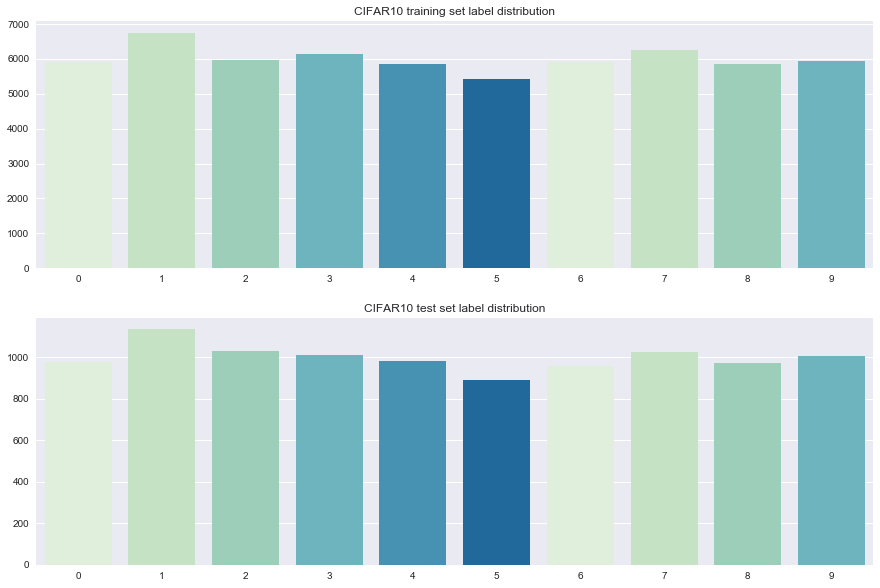

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("CIFAR10 training set label distribution")
sns.barplot(np.arange(10), cifar_training_count, palette=sns.color_palette("GnBu"))
plt.xticks(np.arange(10))
plt.subplot(212)
plt.title("CIFAR10 test set label distribution")
sns.barplot(np.arange(10), cifar_test_count, palette=sns.color_palette("GnBu"))
plt.xticks(np.arange(10))
plt.show()

TODO: comment on label distribution

<b>Q3.</b> Classification
    <ul><li> Implement the Naïve Bayes classifier</li></ul>

In [7]:
class NaiveBayesClassifier(object):
    def __init__(self, normalize=True):       
        self.normalize = normalize
        self.prior = []
        self.mean_var = {}
        print("Created new instance of Naive Bayes Classifier")
    
    def _prior(self, labels):
        num_labels = len(np.unique(labels))
        label, counts = np.unique(labels, return_counts = True)
#        priors = counts/len(labels)
        priors = np.zeros(num_labels)
        for i in range(num_labels):
            priors[label[i]] = counts[i]
        return priors
    
    def _mean_var(self, data):
        mean_var = {}
        for digit in data:
            mean = np.mean(data[digit], axis=0)
            var = np.var(data[digit], axis=0)
            # removing 0 value var
            var_non_0 = np.asarray([v if v != 0 else 1e-3 for v in var])
            mean_var[digit]=(mean, var_non_0)
        return mean_var
    
    def _likelihood(self, sample):
        def _normal(mean, var, x):
            return np.float128((np.exp(-(x-mean)/2*var))/np.sqrt(2*np.pi*var))
        
        sample = sample.flatten()
        likelihoods = np.float128(np.zeros(10))
        for i, (mean, var) in enumerate(self.mean_var.values()):
            likelihoods[i] = np.prod(_normal(mean, var, sample))
        return likelihoods
    
    def _marginal(self, likelihoods):
        return np.sum(likelihoods * self.prior)
    
    def _posterior(self, likelihoods, marginal):
        return (self.prior*likelihoods)/marginal
        
    def fit(self, data, labels):
        t0 = time()
        data_norm = data
        if self.normalize:
            data_norm = data / 255
        #computing prior probabilities for different classes
        self.prior = self._prior(labels)
        
        # now we need to group all the images of each digit
        # digits_imgs contains the list of images(flattened) for each digit 
        digits_imgs = {label:[] for label in np.unique(labels)}
        for img, label in zip(data_norm, labels):
            digits_imgs[label].append(img.flatten())

        # once we've grouped all the samples per digit we can compute the mean and var 
        self.mean_var = self._mean_var(digits_imgs)
        t1 = time()
        print('Training time {:.3f}'.format(t1-t0))


    def predict(self, data):
        t0 = time()
        data_norm = data
        if self.normalize:
            data_norm = data / 255
        
        pred_labels = []
        for sample in data_norm:
            likelihoods = self._likelihood(sample)
            marginal = self._marginal(likelihoods)
            posterior = self._posterior(likelihoods, marginal)
            pred_labels.append(np.argmax(posterior))
        t1 = time()
        print('Classification time {:.3f}'.format(t1-t0))
        return pred_labels

In [10]:
n_classifier = NaiveBayesClassifier()
n_classifier.fit(mnist_train, mnist_label_train)

Created new instance of Naive Bayes Classifier
Training time 1.152


In [11]:
predicted_labels =  n_classifier.predict(mnist_test)

Classification time 4.918


In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(mnist_label_test, predicted_labels))

0.1135
